In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
PROJECT_ROOT_DIR=Path("../../../").resolve()
assert PROJECT_ROOT_DIR.exists()
DATA_PATH = PROJECT_ROOT_DIR / 'data'
assert DATA_PATH.exists()
DATA_PATH_STRING = str(DATA_PATH)
sys.path.append(str((PROJECT_ROOT_DIR / 'build').resolve()))
# check if _aare can be imported
import importlib.util
_aare_module = importlib.util.find_spec("_aare")
assert _aare_module is not None


In [2]:
from _aare import *

In [3]:
transforms = Transforms()
transforms.add([
    Transforms.identity()
])

In [4]:
# order_map to flip frame horizontally
order_map = np.zeros((10,10),dtype = np.uint64)
for i in range(10):
    for j in range(10):
        order_map[i,j]=(9-i)*10+j

order_map

array([[90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9]], dtype=uint64)

In [5]:
reorder_fn = transforms.reorder(order_map)

In [6]:
frame = Frame(10,10,Dtype(DtypeIndex.INT64))
arr = np.array(frame,copy=False)
arr+=np.random.randint(0,10,(10,10))
arr

array([[0, 2, 0, 3, 9, 0, 8, 7, 9, 8],
       [5, 0, 7, 2, 6, 3, 3, 6, 2, 2],
       [8, 7, 3, 4, 4, 3, 6, 1, 9, 6],
       [5, 2, 5, 5, 7, 0, 2, 8, 8, 5],
       [9, 2, 6, 6, 9, 1, 3, 8, 3, 7],
       [6, 9, 4, 8, 2, 9, 3, 3, 4, 1],
       [1, 8, 2, 8, 5, 8, 4, 2, 4, 5],
       [2, 4, 8, 1, 3, 4, 0, 7, 8, 0],
       [0, 9, 0, 5, 5, 0, 4, 9, 5, 3],
       [6, 0, 7, 2, 1, 6, 7, 1, 5, 3]], dtype=int64)

In [7]:
frame_reordered = reorder_fn(frame)
np.array(frame_reordered)

array([[6, 0, 7, 2, 1, 6, 7, 1, 5, 3],
       [0, 9, 0, 5, 5, 0, 4, 9, 5, 3],
       [2, 4, 8, 1, 3, 4, 0, 7, 8, 0],
       [1, 8, 2, 8, 5, 8, 4, 2, 4, 5],
       [6, 9, 4, 8, 2, 9, 3, 3, 4, 1],
       [9, 2, 6, 6, 9, 1, 3, 8, 3, 7],
       [5, 2, 5, 5, 7, 0, 2, 8, 8, 5],
       [8, 7, 3, 4, 4, 3, 6, 1, 9, 6],
       [5, 0, 7, 2, 6, 3, 3, 6, 2, 2],
       [0, 2, 0, 3, 9, 0, 8, 7, 9, 8]], dtype=int64)

In [8]:
def increment(frame):
    arr = np.array(frame,copy=False)
    arr+=1
    print(arr.dtype)
    return to_frame(arr)
t=Transforms()
t.add([
    increment,
    reorder_fn
])


In [9]:
np.array(frame)

array([[6, 0, 7, 2, 1, 6, 7, 1, 5, 3],
       [0, 9, 0, 5, 5, 0, 4, 9, 5, 3],
       [2, 4, 8, 1, 3, 4, 0, 7, 8, 0],
       [1, 8, 2, 8, 5, 8, 4, 2, 4, 5],
       [6, 9, 4, 8, 2, 9, 3, 3, 4, 1],
       [9, 2, 6, 6, 9, 1, 3, 8, 3, 7],
       [5, 2, 5, 5, 7, 0, 2, 8, 8, 5],
       [8, 7, 3, 4, 4, 3, 6, 1, 9, 6],
       [5, 0, 7, 2, 6, 3, 3, 6, 2, 2],
       [0, 2, 0, 3, 9, 0, 8, 7, 9, 8]], dtype=int64)

In [10]:
frame_transformed = t(frame)

int64


In [11]:
np.array(frame_transformed)

array([[ 1,  3,  1,  4, 10,  1,  9,  8, 10,  9],
       [ 6,  1,  8,  3,  7,  4,  4,  7,  3,  3],
       [ 9,  8,  4,  5,  5,  4,  7,  2, 10,  7],
       [ 6,  3,  6,  6,  8,  1,  3,  9,  9,  6],
       [10,  3,  7,  7, 10,  2,  4,  9,  4,  8],
       [ 7, 10,  5,  9,  3, 10,  4,  4,  5,  2],
       [ 2,  9,  3,  9,  6,  9,  5,  3,  5,  6],
       [ 3,  5,  9,  2,  4,  5,  1,  8,  9,  1],
       [ 1, 10,  1,  6,  6,  1,  5, 10,  6,  4],
       [ 7,  1,  8,  3,  2,  7,  8,  2,  6,  4]], dtype=int64)

In [12]:
# testing Dtype
cond = True
cond = cond and np.array(Frame(10,10,Dtype(DtypeIndex.INT8))).dtype == np.int8
cond = cond and np.array(Frame(10,10,Dtype(DtypeIndex.INT16))).dtype == np.int16
cond = cond and np.array(Frame(10,10,Dtype(DtypeIndex.INT32))).dtype == np.int32
cond = cond and np.array(Frame(10,10,Dtype(DtypeIndex.INT64))).dtype == np.int64
cond = cond and np.array(Frame(10,10,Dtype(DtypeIndex.UINT8))).dtype == np.uint8
cond = cond and np.array(Frame(10,10,Dtype(DtypeIndex.UINT16))).dtype == np.uint16
cond = cond and np.array(Frame(10,10,Dtype(DtypeIndex.UINT32))).dtype == np.uint32
cond = cond and np.array(Frame(10,10,Dtype(DtypeIndex.UINT64))).dtype == np.uint64
cond = cond and np.array(Frame(10,10,Dtype(DtypeIndex.FLOAT))).dtype == np.float32
cond = cond and np.array(Frame(10,10,Dtype(DtypeIndex.DOUBLE))).dtype == np.float64
cond

True

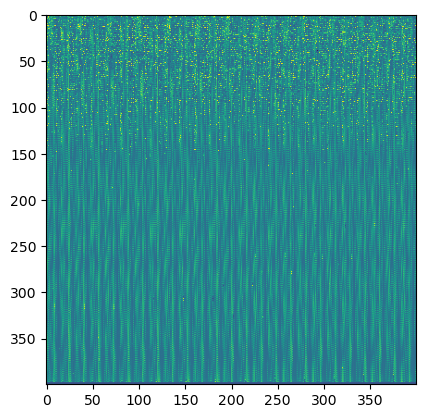

In [18]:
transforms = Transforms()
transforms.add(Transforms.reorder_moench())
file = File("/mnt/sls_det_storage/moench_data/testNewFW20230714/cu_half_speed_master_4.json")
frame = file.iread(10)

plt.imshow(transforms(frame))